In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('OneDrive/Рабочий стол/FData.csv', sep=';')

df.columns = df.columns.str.lower()
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index(df['date'], inplace=True)

#Создаём поле рассматриваемого признака без трендовой компоненты
df['spread_shifted'] = df['spread'] - df['spread'].shift(1) 

#Заменяем прямые значения ставок на спред - приводим в парадигму рассматриваемого признака
df['cutoffratecbauc'] = df['cutoffratecbauc'] - df['keyrate']
df['weightedratecbauc'] = df['weightedratecbauc'] - df['keyrate']
df = df[~df['spread_shifted'].isna()]
df

,from_start(%),to_end(%),year,month,day,weekday,end_rep_period,keyrate,ruonia,expected_kr,...,freeliq,roskazna,mosru,bank funds on current accounts at the bank of russia,volume in applications (billion rubles),volume of attracted funds (billion rubles),block_liq,liq_delta,relative_liq_delta,spread_shifted
date,,,,,,,,,,,,,,,,,,,,,
2019-06-17,0.352941,0.647059,2019,6,17,1,0,7.5,7.41,NaN,...,1967,100,1867,2312.7,NaN,NaN,NaN,NaN,NaN,0.17
2019-06-18,0.382353,0.617647,2019,6,18,2,0,7.5,7.48,NaN,...,1955,100,1855,2274.2,NaN,NaN,NaN,NaN,NaN,0.07
2019-06-19,0.411765,0.588235,2019,6,19,3,0,7.5,7.49,NaN,...,2354,500,1854,2457.6,NaN,NaN,NaN,NaN,NaN,0.01
2019-06-20,0.441176,0.558824,2019,6,20,4,0,7.5,7.40,NaN,...,2348,500,1848,2856.3,NaN,NaN,NaN,NaN,NaN,-0.09
2019-06-21,0.470588,0.529412,2019,6,21,5,0,7.5,7.41,NaN,...,2448,601,1847,3010.5,NaN,NaN,NaN,NaN,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-15,0.296296,0.703704,2025,5,15,4,0,21.0,20.93,20.01,...,9215,7734,1481,NaN,NaN,NaN,NaN,NaN,NaN,0.06
2025-05-16,0.333333,0.666667,2025,5,16,5,0,21.0,20.92,20.01,...,9345,7886,1459,NaN,NaN,NaN,NaN,NaN,NaN,-0.01
2025-05-19,0.444444,0.555556,2025,5,19,1,0,21.0,20.90,20.01,...,9329,7888,1441,NaN,NaN,NaN,NaN,NaN,NaN,-0.02


Index(['from_start(%)', 'to_end(%)', 'year', 'month', 'day', 'weekday',
       'end_rep_period', 'keyrate', 'ruonia', 'expected_kr', 'delta_kr',
       'relative_delta_kr', 'spread', 'prev_spread', 'to_cb(%)', 'to_tax(%)',
       'to_cbs_auc(%)', 'cb', 'tax', 'cbs_auc', 'date', 'avgfor_delta',
       'norm_avgfor', 'avgnorm_avgfor', 'cutoffratecbauc', 'weightedratecbauc',
       'supply', 'rens', 'deficiency (+)/surplus (-) liquidity',
       'deficiency (+)/surplus (-) liquidity excluding current accounts',
       'freeliq', 'roskazna', 'mosru',
       'bank funds on current accounts at the bank of russia',
       'volume in applications (billion rubles)',
       'volume of attracted funds (billion rubles)', 'block_liq', 'liq_delta',
       'relative_liq_delta', 'spread_shifted'],
      dtype='object')


count    1685.000000
mean       -0.169881
std         0.280937
min        -0.970000
25%        -0.320000
50%        -0.160000
75%        -0.020000
max         1.210000
Name: spread, dtype: float64

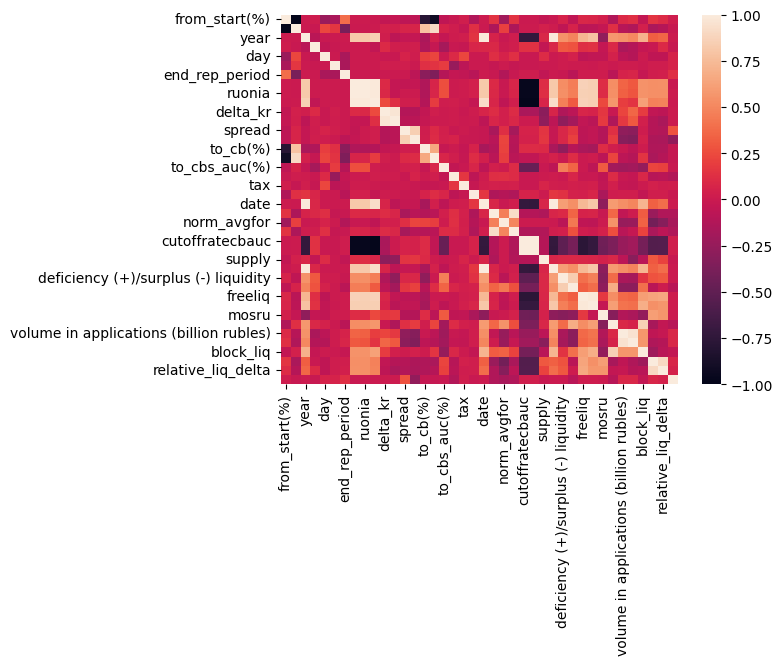

In [156]:
print(df.columns)
mtrx = df.corr()
sns.heatmap(mtrx)

df['spread'].describe()

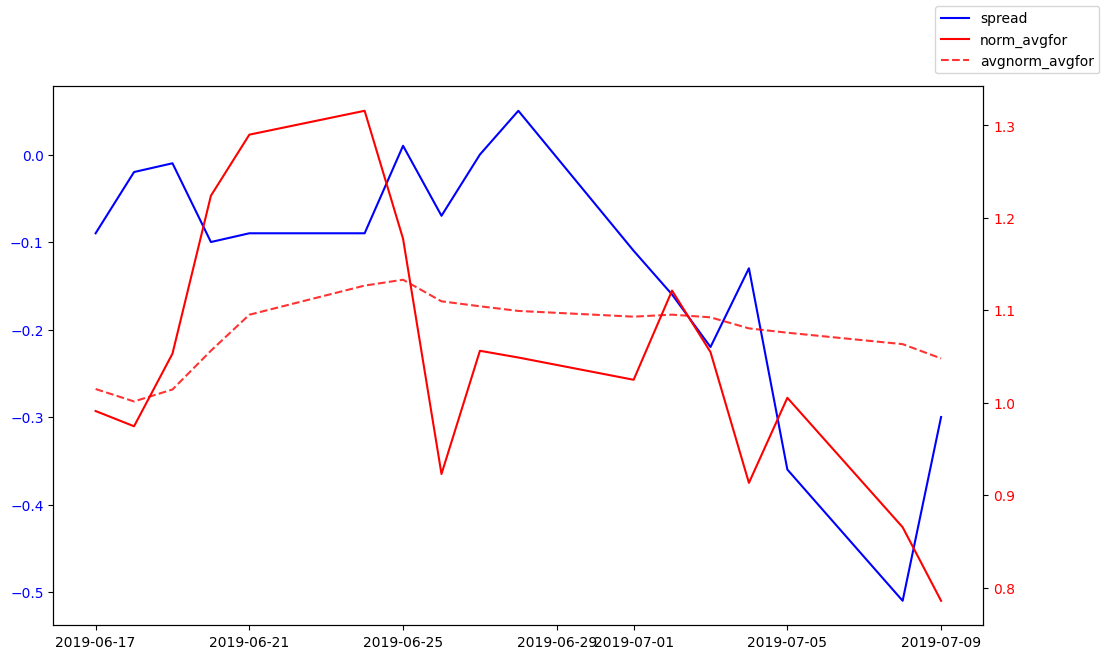

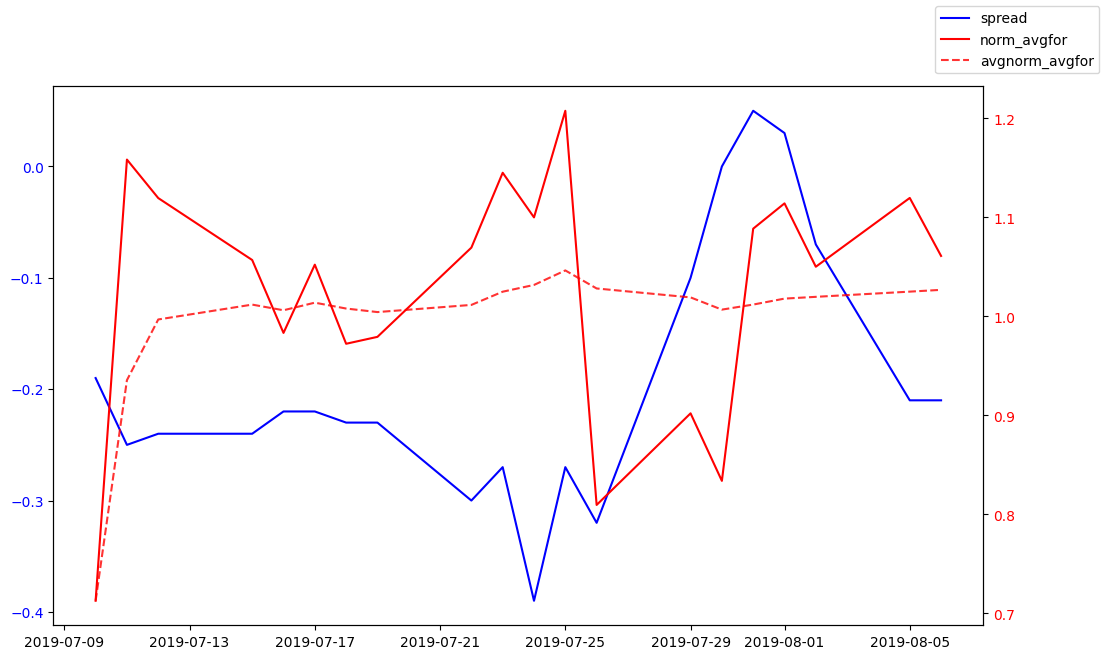

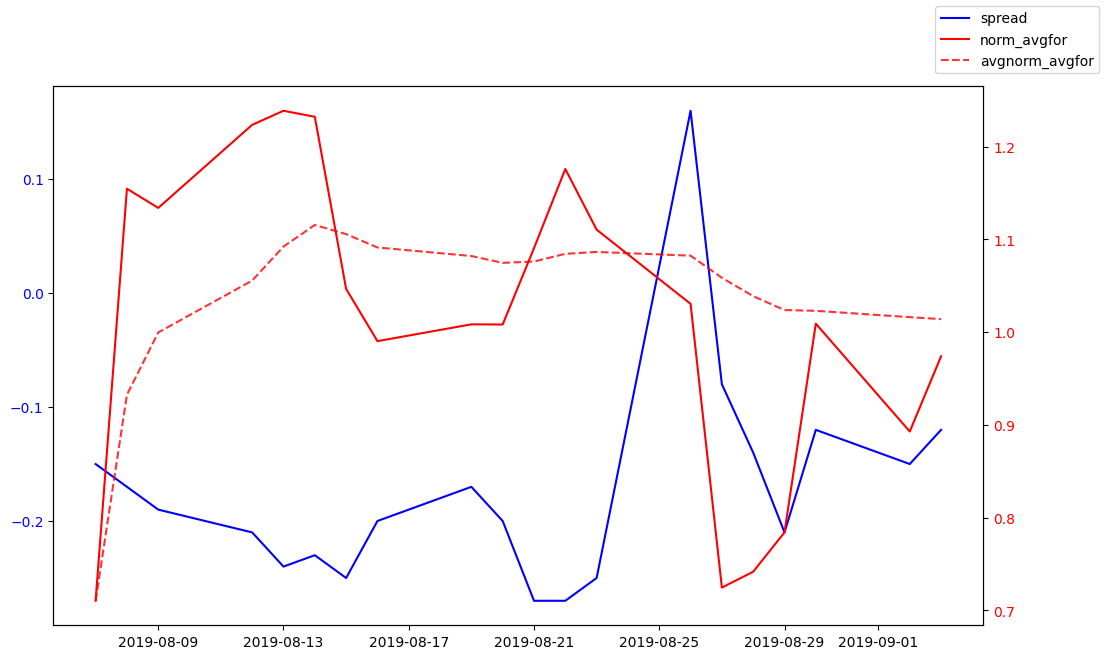

In [157]:
fgr = []
cnt = df.rens.unique()
cnt = cnt[:3]

#Поле rens является техническим, представляет собой нумерацию периодов усреднения с некоторого случайног числа
for i in cnt:
    
    fig, ax1 = plt.subplots(figsize = (12, 7))
    
    ax1.plot(df[df['rens'] == i].index, df[df['rens'] == i]['spread'], color='blue', label='spread')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    ax2 = ax1.twinx()
    ax2.plot(df[df['rens'] == i].index, df[df['rens'] == i]['norm_avgfor'], color='red', label='norm_avgfor')
    ax2.plot(df[df['rens'] == i].index, df[df['rens'] == i]['avgnorm_avgfor'], color='red', label='avgnorm_avgfor', linestyle='--', alpha=0.8)
    ax2.tick_params(axis='y', labelcolor='red')

    fig.legend()
    fgr.append(fig)

#Визуализация кривых усреднения банков и спреда некоторых периодов усреднения
plt.show()

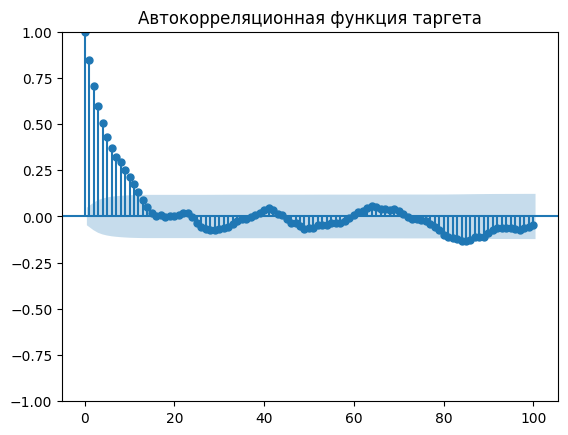

In [158]:
from statsmodels.graphics.tsaplots import plot_acf

#Набор данных предсталяет собой временной ряд, потому актуально построение коррелограммы
fig, ax = plt.subplots()
plot_acf(df['spread'], lags=100, ax = ax)
plt.title('Автокорреляционная функция таргета')
plt.show()

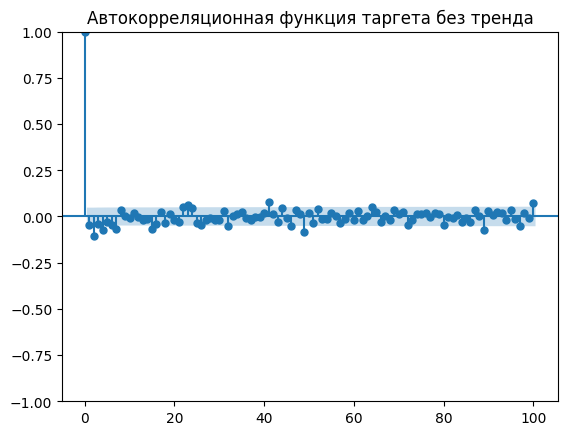

In [159]:
#На коррелограмме рассматриваемого признака наблюдалась корреляция значений от лага
#Предполагаю, что это влияние трендовой компоненты
#Потому рассмотрим коррелограмму более стационарного ряда
fig, ax = plt.subplots()

plot_acf(df['spread_shifted'], lags=100, ax = ax)
plt.title('Автокорреляционная функция таргета без тренда')
plt.show()
#На ней наблюдаем отсутствие статистически значимой корреляции

In [175]:
df.isna().sum()

from_start(%)                                                        0
to_end(%)                                                            0
year                                                                 0
month                                                                0
day                                                                  0
weekday                                                              0
end_rep_period                                                       0
keyrate                                                              0
ruonia                                                               0
expected_kr                                                        955
delta_kr                                                           955
relative_delta_kr                                                  955
spread                                                               0
prev_spread                                                          0
to_cb(

In [177]:
#Избавляемся от NaN данных
df1 = df[~df['to_cb(%)'].isna()]
df1.isna().sum()

from_start(%)                                                        0
to_end(%)                                                            0
year                                                                 0
month                                                                0
day                                                                  0
weekday                                                              0
end_rep_period                                                       0
keyrate                                                              0
ruonia                                                               0
expected_kr                                                        573
delta_kr                                                           573
relative_delta_kr                                                  573
spread                                                               0
prev_spread                                                          0
to_cb(

In [179]:
df2 = df1[~df1['block_liq'].isna()]
df2.isna().sum()

from_start(%)                                                        0
to_end(%)                                                            0
year                                                                 0
month                                                                0
day                                                                  0
weekday                                                              0
end_rep_period                                                       0
keyrate                                                              0
ruonia                                                               0
expected_kr                                                        367
delta_kr                                                           367
relative_delta_kr                                                  367
spread                                                               0
prev_spread                                                          0
to_cb(

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
scaler = StandardScaler()

#Удаляем неактуальные для анализа поля 
to_drop = ['from_start(%)', 'ruonia', 'expected_kr', 'delta_kr', 'relative_delta_kr', 'spread', 'prev_spread', 'date', 'spread_shifted']
X = df2.drop(columns=to_drop)

#Будем оценивать влияние признаков на чистый таргет и таргет без тренда
y1, y2 = df2['spread'], df2['spread_shifted']

#Нормируем данные
X0 = scaler.fit_transform(X)

X0 = pd.DataFrame(X0)
X0.columns = X.columns
X0

,to_end(%),year,month,day,weekday,end_rep_period,keyrate,to_cb(%),to_tax(%),to_cbs_auc(%),...,deficiency (+)/surplus (-) liquidity excluding current accounts,freeliq,roskazna,mosru,bank funds on current accounts at the bank of russia,volume in applications (billion rubles),volume of attracted funds (billion rubles),block_liq,liq_delta,relative_liq_delta
0,1.579384,-1.544104,-0.207743,-0.733249,-0.034409,-0.220439,-0.906907,1.289374,1.576410,0.002605,...,-1.186912,-0.881002,-1.012294,0.405828,-1.196938,-0.024851,-0.383478,-1.173055,0.277255,0.616204
1,1.456366,-1.544104,-0.207743,-0.615860,0.670969,-0.220439,-0.906907,1.191178,1.460759,-0.082841,...,-0.509366,-0.746162,-0.868564,0.393786,-0.532145,-0.024851,-0.383478,-0.631059,-0.077019,0.174031
2,0.964292,-1.544104,-0.207743,-0.146306,-1.445165,-0.220439,-0.906907,0.798393,0.998157,-0.424623,...,-0.516953,-0.754321,-0.877547,0.395793,-0.550778,-0.024851,-0.383478,-0.646250,-0.071717,0.179353
3,0.841273,-1.544104,-0.207743,-0.028918,-0.739787,-0.220439,-0.906907,0.700197,0.882507,-0.510068,...,-0.516564,-0.618622,-0.742801,0.427905,-0.619609,-0.024851,-0.383478,-0.702367,0.132654,0.419562
4,0.718255,-1.544104,-0.207743,0.088471,-0.034409,-0.220439,-0.906907,0.602001,0.766856,-0.082841,...,-0.534917,-0.724261,-0.855090,0.435933,-0.532398,0.773708,-0.524148,-0.703607,0.470058,0.728823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,-0.142874,1.857737,-1.121961,1.144968,-0.034409,-0.220439,1.783753,-0.085372,0.072954,0.002605,...,0.025835,1.245523,1.398316,-0.427083,1.211314,-0.307286,-1.528937,0.201287,1.795090,1.188593
816,-0.265893,1.857737,-1.121961,1.262356,0.670969,-0.220439,1.783753,-0.183568,-0.042697,-0.082841,...,-0.039403,1.527657,1.707334,-0.489300,1.198955,-0.307286,-1.528937,0.191211,2.120926,1.279777
817,-0.388911,1.857737,-1.121961,1.379745,1.376347,-0.220439,1.783753,-0.281765,-0.158347,-0.168286,...,0.281407,2.519635,2.753863,-0.529440,1.546088,-0.307286,-1.528937,0.474223,2.970220,1.414856
818,-0.757967,1.857737,-1.121961,1.731910,-1.445165,-0.220439,1.783753,-0.576353,-0.505299,-0.424623,...,0.341976,2.861030,2.991915,0.002418,1.240089,-0.307286,-1.528937,0.224746,3.586222,1.560257


In [193]:
model1 = LinearRegression()
model1.fit(X0, y1)

LinearRegression()

In [194]:
model2 = LinearRegression()
model2.fit(X0, y2)

LinearRegression()

In [210]:
#Выведем признаки и соответствующие коэффициенты влияния
features = []
cf1 = []
cf2 = []

for i in range(len(X0.columns)):
    features.append(X0.columns[i])
    cf1.append(model1.coef_[i])
    cf2.append(model2.coef_[i])

features_coeff = pd.DataFrame({'feature': features, 'model1_coeff': cf1, 'model2_coeff': cf2})
features_coeff.reindex(features_coeff['model1_coeff'].abs().sort_values(ascending=False).index).head(5)

,feature,model1_coeff,model2_coeff
29,liq_delta,-64.294410,-44.081342
27,volume of attracted funds (billion rubles),-42.732050,-29.205505
28,block_liq,-37.282466,-25.453860
22,freeliq,35.355934,24.255387
23,roskazna,35.239118,24.154328
